In [6]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import requests
from bs4 import BeautifulSoup
import os
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

In [7]:
options = webdriver.ChromeOptions()
#options.add_argument('headless')
options.add_argument('disable-gpu')
options.add_argument('lang=ko_KR')
prefs = {"profile.default_content_setting_values.notifications": 2} 
options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome('./chromedriver', options=options)

In [8]:
k='치즈볼'
# now = datetime.datetime.now() - datetime.timedelta(days = 1)
# Gdate = now.strftime('%Y-%m-%d')
# Kdate = now.strftime('%Y%m%d')
# oneyear = now + relativedelta(years=-1)
# Goneyear = oneyear.strftime('%Y-%m-%d')
# Koneyear = oneyear.strftime('%Y%m%d')
# print(Gdate, '\n', Kdate)
# print(Goneyear, '\n', Koneyear)


In [9]:
#Kakaodatatrend 파일 다운로드
url = 'https://datatrend.kakao.com/result?q={0}&from={1}&to={2}&interval=w'.format(k,Koneyear,Kdate)
driver.get(url)
time.sleep(0.5)

In [10]:
driver.find_element_by_xpath('//*[@id="root"]/div/header/div/div/a[2]').click()

In [27]:
df_daum=pd.read_excel('C:/Users/02/Downloads/datatrend.xls')
df_daum.head(60)
df_daum.tail(50)

,기간,2019-10-20 ~ 2020-10-20
47,2020-07-20 00:00:00,40
48,2020-07-27 00:00:00,42
49,2020-08-03 00:00:00,42
50,2020-08-10 00:00:00,46
51,2020-08-17 00:00:00,51
52,2020-08-24 00:00:00,59
53,2020-08-31 00:00:00,60
54,2020-09-07 00:00:00,81
55,2020-09-14 00:00:00,80
56,2020-09-21 00:00:00,46


In [30]:
clean_daum = df_daum.loc[7:59] 
clean_daum.columns =["date","kakao"]
clean_daum.reset_index(drop=True, inplace=True)
print(clean_daum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    53 non-null     object
 1   kakao   53 non-null     object
dtypes: object(2)
memory usage: 976.0+ bytes
None


In [8]:
os.remove('C:/Users/02/Downloads/datatrend.xls')

In [13]:
#googletrend 파일 다운로드
url = 'https://trends.google.co.kr/trends/explore?date={0}%20{1}&geo=KR&q={2}'.format(Goneyear,Gdate,k)
driver.get(url)
time.sleep(2.0)
driver.get(url)
time.sleep(2.0)

In [14]:
driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]/i').click()

In [15]:
df_google=pd.read_csv('C:/Users/02/Downloads/multiTimeline.csv')

In [16]:
df_google = df_google.reset_index()
clean_google = df_google.loc[1:53] 
clean_google.columns = ["date","google"]
clean_google.reset_index(drop=True,inplace=True)
print(clean_google)

          date google
0   2019-10-20     90
1   2019-10-27     17
2   2019-11-03     47
3   2019-11-10     33
4   2019-11-17     34
5   2019-11-24     46
6   2019-12-01     37
7   2019-12-08     29
8   2019-12-15     36
9   2019-12-22     42
10  2019-12-29     25
11  2020-01-05     42
12  2020-01-12     38
13  2020-01-19     25
14  2020-01-26     59
15  2020-02-02     50
16  2020-02-09     48
17  2020-02-16     28
18  2020-02-23     47
19  2020-03-01     33
20  2020-03-08     46
21  2020-03-15     59
22  2020-03-22     64
23  2020-03-29     58
24  2020-04-05     35
25  2020-04-12     29
26  2020-04-19     45
27  2020-04-26     56
28  2020-05-03     48
29  2020-05-10     27
30  2020-05-17     71
31  2020-05-24     50
32  2020-05-31     49
33  2020-06-07     40
34  2020-06-14     47
35  2020-06-21     22
36  2020-06-28     45
37  2020-07-05     32
38  2020-07-12     58
39  2020-07-19     23
40  2020-07-26     45
41  2020-08-02     52
42  2020-08-09     74
43  2020-08-16     45
44  2020-0

In [13]:
os.remove('C:/Users/02/Downloads/multiTimeline.csv')

In [17]:
#naver
url = 'https://datalab.naver.com/keyword/trendSearch.naver'
driver.get(url)
time.sleep(0.5)

In [18]:
driver.find_element_by_id('item_keyword1').send_keys(k)
driver.find_element_by_id('timeDimensionTitle').send_keys(Keys.ENTER)
driver.find_element_by_xpath('//*[@id="timeDimensionDiv"]/ul/li[2]/a').click()
driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div/form/fieldset/a/span').click()

In [19]:
driver.find_element_by_xpath('//*[@id="content"]/div/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()

In [20]:
df_naver=pd.read_excel('C:/Users/02/Downloads/datalab.xlsx')

In [21]:
clean_naver = df_naver.loc[7:59] 
clean_naver.columns = ["date","naver"]
clean_naver.reset_index(drop=True,inplace=True)
print(clean_naver)

          date     naver
0   2019-10-14  64.70618
1   2019-10-21  72.08369
2   2019-10-28  62.38753
3   2019-11-04  57.51889
4   2019-11-11  56.96879
5   2019-11-18  54.92776
6   2019-11-25  54.49591
7   2019-12-02  56.40326
8   2019-12-09   58.9584
9   2019-12-16  56.84026
10  2019-12-23  54.62958
11  2019-12-30  55.55498
12  2020-01-06  56.99449
13  2020-01-13  59.70387
14  2020-01-20  48.38825
15  2020-01-27  62.29499
16  2020-02-03  76.73641
17  2020-02-10  84.14991
18  2020-02-17   92.9618
19  2020-02-24  95.51694
20  2020-03-02  88.13428
21  2020-03-09   95.1622
22  2020-03-16  90.69456
23  2020-03-23  85.27582
24  2020-03-30     100.0
25  2020-04-06   92.4117
26  2020-04-13  74.46917
27  2020-04-20  69.46686
28  2020-04-27  62.57261
29  2020-05-04  58.05871
30  2020-05-11  66.42332
31  2020-05-18   64.3463
32  2020-05-25  54.37766
33  2020-06-01  48.75327
34  2020-06-08  50.16194
35  2020-06-15  42.15721
36  2020-06-22  43.62243
37  2020-06-29  44.33191
38  2020-07-06  46.72767


In [ ]:
os.remove('C:/Users/02/Downloads/datalab.xlsx')

In [ ]:
clean_naver['naver']

In [22]:
driver.close()

In [31]:
total_df = pd.concat([clean_naver,clean_daum['kakao'],clean_google['google']],axis=1)
print(total_df)

          date     naver kakao google
0   2019-10-14  64.70618    86     90
1   2019-10-21  72.08369    78     17
2   2019-10-28  62.38753    75     47
3   2019-11-04  57.51889    63     33
4   2019-11-11  56.96879    69     34
5   2019-11-18  54.92776    59     46
6   2019-11-25  54.49591    61     37
7   2019-12-02  56.40326    63     29
8   2019-12-09   58.9584    84     36
9   2019-12-16  56.84026    69     42
10  2019-12-23  54.62958    54     25
11  2019-12-30  55.55498    63     42
12  2020-01-06  56.99449    55     38
13  2020-01-13  59.70387    55     25
14  2020-01-20  48.38825    49     59
15  2020-01-27  62.29499    69     50
16  2020-02-03  76.73641    87     48
17  2020-02-10  84.14991    86     28
18  2020-02-17   92.9618    74     47
19  2020-02-24  95.51694    86     33
20  2020-03-02  88.13428    91     46
21  2020-03-09   95.1622   100     59
22  2020-03-16  90.69456    96     64
23  2020-03-23  85.27582    77     58
24  2020-03-30     100.0    88     35
25  2020-04-

In [32]:
total_df['date'] = pd.to_datetime(total_df['date'])
total_df.set_index('date', inplace=True)
print(total_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2019-10-14 to 2020-10-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   naver   53 non-null     object
 1   kakao   53 non-null     object
 2   google  53 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB
None


In [37]:
total_df=total_df.astype(float)
total_df=total_df.astype(int)
print(total_df.info())
total_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2019-10-14 to 2020-10-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   naver   53 non-null     int32
 1   kakao   53 non-null     int32
 2   google  53 non-null     int32
dtypes: int32(3)
memory usage: 1.0 KB
None


,naver,kakao,google
date,,,
2019-10-14,64,86,90
2019-10-21,72,78,17
2019-10-28,62,75,47
2019-11-04,57,63,33
2019-11-11,56,69,34
2019-11-18,54,59,46
2019-11-25,54,61,37
2019-12-02,56,63,29
2019-12-09,58,84,36


In [40]:
total_df.to_csv('./searchtrend.csv')

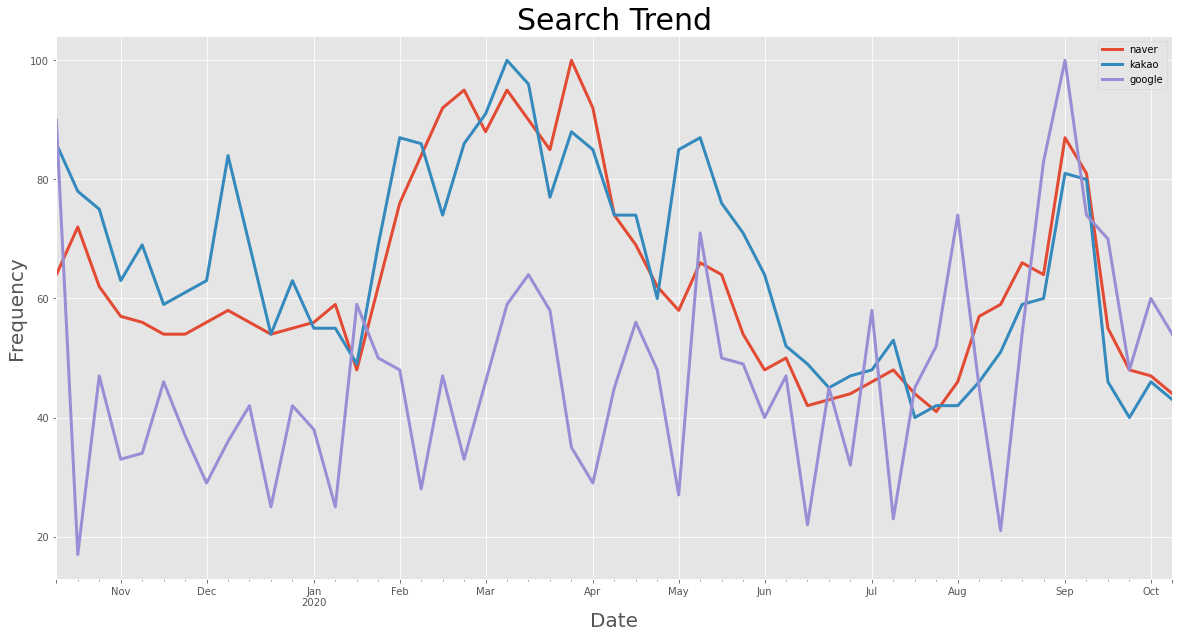

In [42]:
plt.style.use('ggplot')
total_df.plot(linewidth=3, figsize=(20, 10))
plt.title('Search Trend', size=30)
plt.ylabel('Frequency', size=20)
plt.xlabel('Date', size=20)
plt.show()